In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import numpy as np

from oscopetools import read_data as rd

/home/eharkin/miniconda3/envs/oscope/lib/python3.8/site-packages/pims/image_reader.py:26: RuntimeWarning: PIMS image_reader.py could not find scikit-image. Falling back to matplotlib's imread(), which uses floats instead of integers. This may break your scripts. 
(To ignore this warning, include the line "warnings.simplefilter("ignore", RuntimeWarning)" in your script.)
  warnings.warn(RuntimeWarning(ski_preferred))


In [2]:
DATA_PATH = '/data/eharkin/openscope2019_data/center_surround'
IMG_PATH = '/data/eharkin/openscope2019_data/plots/behaviour_summary'

In [3]:
eyetracking = [
    rd.get_eye_tracking(os.path.join(DATA_PATH, fname)) 
    for fname in os.listdir(DATA_PATH) 
    if fname.endswith('.h5')
]

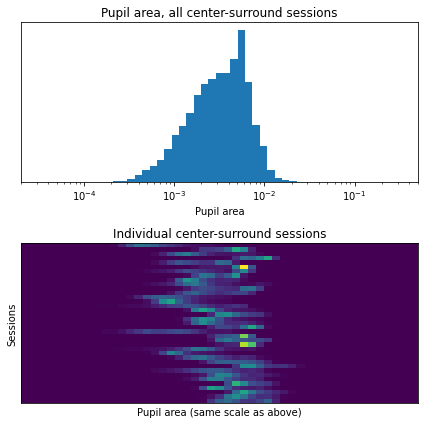

In [4]:
bins = np.logspace(-4.5, -0.5)

plt.figure(figsize=(6, 6))

all_ax = plt.subplot(211)
all_ax.set_xscale('log')
all_ax.set_title('Pupil area, all center-surround sessions')

sessions = []
for et in eyetracking:
    sessions.append(et.data['pupil_area'].to_numpy())
    
all_ax.hist(np.concatenate(sessions), bins=bins)
all_ax.set_yticks([])
all_ax.set_xlabel('Pupil area')

individual_ax = plt.subplot(212)
individual_ax.set_title('Individual center-surround sessions')
individual_ax.imshow(np.array([np.histogram(sess, bins=bins)[0] for sess in sessions]), aspect='auto')
individual_ax.set_xticks([])
individual_ax.set_yticks([])
individual_ax.set_ylabel('Sessions')
individual_ax.set_xlabel('Pupil area (same scale as above)')

plt.tight_layout()

plt.savefig(os.path.join(IMG_PATH, 'pupil_area_center_surround.png'), dpi=600)
plt.show()

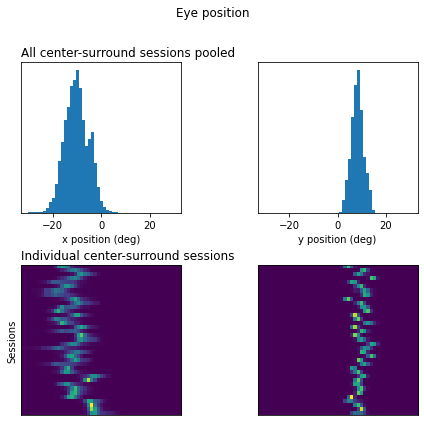

In [5]:
bins = np.linspace(-30, 30)

plt.figure(figsize=(6, 6))
plt.suptitle('Eye position')

all_x_ax = plt.subplot(221)
individual_x_ax = plt.subplot(223)
all_y_ax = plt.subplot(222)
individual_y_ax = plt.subplot(224)

sessions = {
    'x': [],
    'y': []
}

for et in eyetracking:
    sessions['x'].append(et.data['x_pos_deg'].to_numpy())
    sessions['y'].append(et.data['y_pos_deg'].to_numpy())
    
all_x_ax.hist(np.concatenate(sessions['x']), bins=bins)
all_x_ax.set_title('All center-surround sessions pooled', loc='left')
all_x_ax.set_yticks([])
all_x_ax.set_xlabel('x position (deg)')
individual_x_ax.imshow(np.array([np.histogram(sess, bins=bins)[0] for sess in sessions['x']]), aspect='auto')
individual_x_ax.set_title('Individual center-surround sessions', loc='left')
individual_x_ax.set_ylabel('Sessions')
individual_x_ax.set_yticks([])
individual_x_ax.set_xticks([])

all_y_ax.hist(np.concatenate(sessions['y']), bins=bins)
all_y_ax.set_yticks([])
all_y_ax.set_xlabel('y position (deg)')
individual_y_ax.imshow(np.array([np.histogram(sess, bins=bins)[0] for sess in sessions['y']]), aspect='auto')
individual_y_ax.set_yticks([])
individual_y_ax.set_xticks([])

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig(os.path.join(IMG_PATH, 'eye_position_center_surround.png'), dpi=600)
plt.show()